<a href="https://colab.research.google.com/github/shab-sa/cs_internship/blob/main/Step9/Fraud%20Detection%20copy%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
file=zipfile.ZipFile('emails.csv.zip')
file.extractall()

In [5]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shabnamsalman","key":"a636bd9f12f61863ecb0cbde61515250"}'}

In [7]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d wcukierski/enron-email-dataset

 99% 353M/358M [00:03<00:00, 101MB/s] 
100% 358M/358M [00:03<00:00, 114MB/s]


In [10]:
! unzip enron-email-dataset.zip

Archive:  enron-email-dataset.zip
  inflating: emails.csv              


In [11]:
import pandas  as pd
df=pd.read_csv('emails.csv')

In [12]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [13]:
df["message"][0].split("\n")

['Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>',
 'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: tim.belden@enron.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Tim Belden <Tim Belden/Enron@EnronXGate>',
 'X-cc: ',
 'X-bcc: ',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Here is our forecast',
 '',
 ' ']

In [14]:
import re
def create_dataframe(series):
    data = []
    #for line in series.split('\n'):
        #data.append(dict(re.findall(r"(Message-ID|Date|From|To|Subject|Mime-Version|Content-Type|Content-Transfer-Encoding|X-From|X-To|X-cc|X-bcc|X-Folder|X-Origin|X-FileName)\s*:\s*([^\s]+)", line)))
        #data1={k:v for element in data for k,v in element.items()}
#    data1={}
    d=' '.join(series.split('\n')[15:]).strip()
    return d

In [15]:
df['text'] = df['message'].map(create_dataframe)
#df_splited = pd.DataFrame.from_records(df1).fillna("")

In [16]:
print(df.shape)

(517401, 3)


In [17]:
df=df.drop(columns=['file','message'])

In [18]:
df=df.drop_duplicates()

In [19]:
df.shape

(313411, 1)

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
stop = stopwords.words('english')
#tag=0
#emo=0
def tokenizer(text):
    #global tag,emo
    #text = re.sub('<[^>]*>', '', text)
    #if re.findall('<[^>]*>', text):
        #tag += 1
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    #if emoticons:
        #emo += 1
    text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    #tokenized = [WordNetLemmatizer().lemmatize(w) for w in tokenized]
    #tokenized = [PorterStemmer().stem(w) for w in tokenized]
    t=' '.join(tokenized)
    return t

In [24]:
df['text']=df['text'].map(tokenizer)

In [25]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#count = CountVectorizer()
tfidf = TfidfVectorizer()#use_idf=True, norm='l2', smooth_idf=True)
#np.set_printoptions(precision=2)
x_train = tfidf.fit_transform(list(df['text']))
print(x_train)

  (0, 333911)	1.0
  (1, 608025)	0.047992507040428324
  (1, 468978)	0.06729240987311319
  (1, 580739)	0.12074663818057395
  (1, 332769)	0.12489732265593645
  (1, 398103)	0.1359648452995758
  (1, 218819)	0.13718326236567024
  (1, 576326)	0.2643596389176104
  (1, 544048)	0.12655515316516427
  (1, 350326)	0.11630136265419078
  (1, 513538)	0.09417927709679484
  (1, 195623)	0.10186390161838729
  (1, 349754)	0.061010366103055616
  (1, 592297)	0.11608235988057766
  (1, 334235)	0.09742182727454858
  (1, 284095)	0.06870109816462103
  (1, 598039)	0.08813201560984679
  (1, 554049)	0.10147372351501645
  (1, 364830)	0.08568681775787687
  (1, 211285)	0.07732572597687819
  (1, 458107)	0.07396837967504973
  (1, 617346)	0.08794349388142064
  (1, 642944)	0.09921325911467217
  (1, 533911)	0.12892617585673274
  (1, 497766)	0.07695269073714538
  :	:
  (313410, 647155)	0.02643890658524753
  (313410, 448834)	0.03930952109488218
  (313410, 549495)	0.030971312861948222
  (313410, 591465)	0.04000313847186345
  (

In [26]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=2, random_state=42)
x_train_r=model.fit_transform(x_train)

In [ ]:
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components=2)
# dimensionality reduction:
x_train_pca = pca.fit_transform(x_train.todense())

MemoryError: Unable to allocate 1.55 TiB for an array with shape (313411, 678583) and data type float64

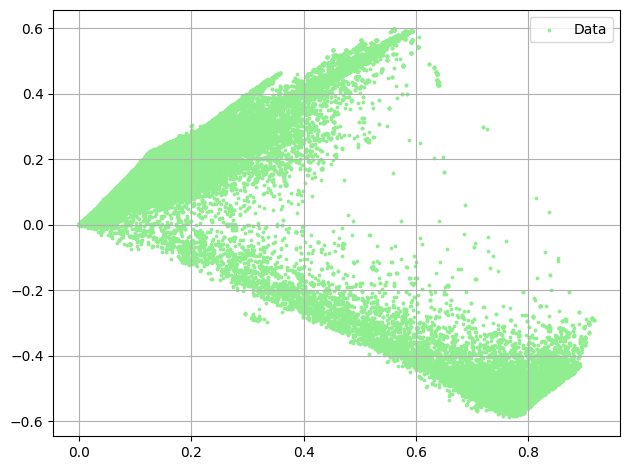

In [27]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[:, 0], x_train_r[:, 1], s=3, c='lightgreen', label='Data')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=1).fit(x_train_r)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to cluster {cluster_ids}: {cluster_sizes}")

Number of elements assigned to cluster [0 1]: [295449  17962]


In [29]:
y=KMeans.predict(kmeans, x_train_r)
kmeans.cluster_centers_.shape

(2, 2)

In [30]:
kmeans.cluster_centers_[:,0:2]

array([[ 0.09644963,  0.10309558],
       [ 0.75596492, -0.46711908]])

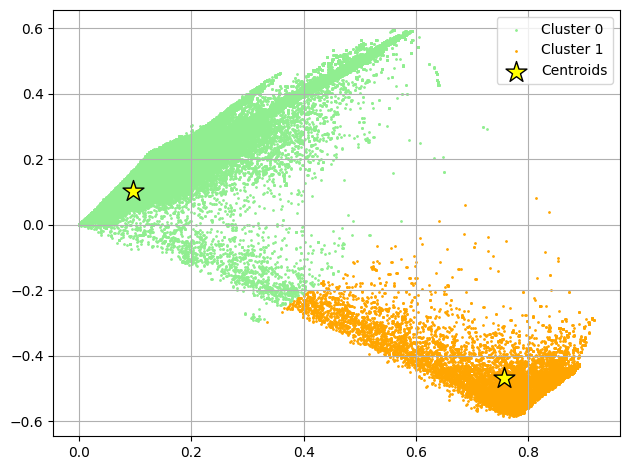

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[y == 0, 0], x_train_r[y == 0, 1], s=1, c='lightgreen', label='Cluster '+str(cluster_ids[0]))
plt.scatter(x_train_r[y == 1, 0], x_train_r[y == 1, 1], s=1, c='orange', label='Cluster '+str(cluster_ids[1]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x_train_r,kmeans.labels_, metric='euclidean', sample_size=10000 )
print(score)

0.8301567766260312
